In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
filepath = "datasets/DC_Properties.csv"

pima_df = pd.read_csv(filepath)
pima_df.head()

C:\Users\kenbe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
pima_df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [4]:
pima_df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2594FE7F0>,
      dtype=object)

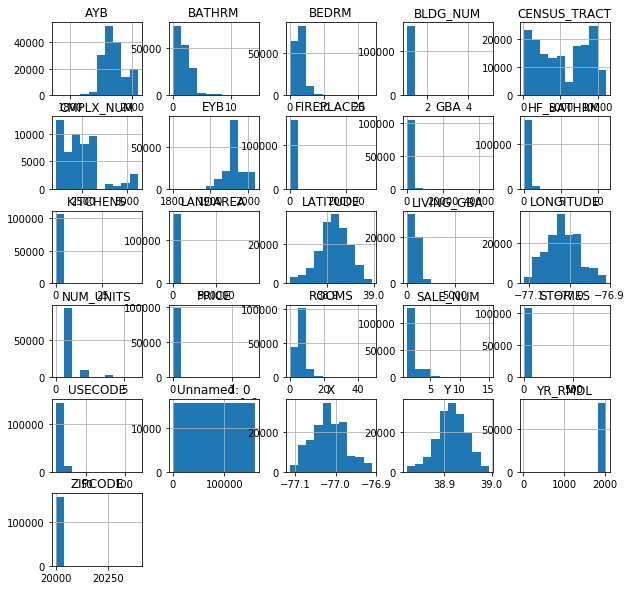

In [5]:
pima_df.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D257BE87F0>,
      dtype=object)

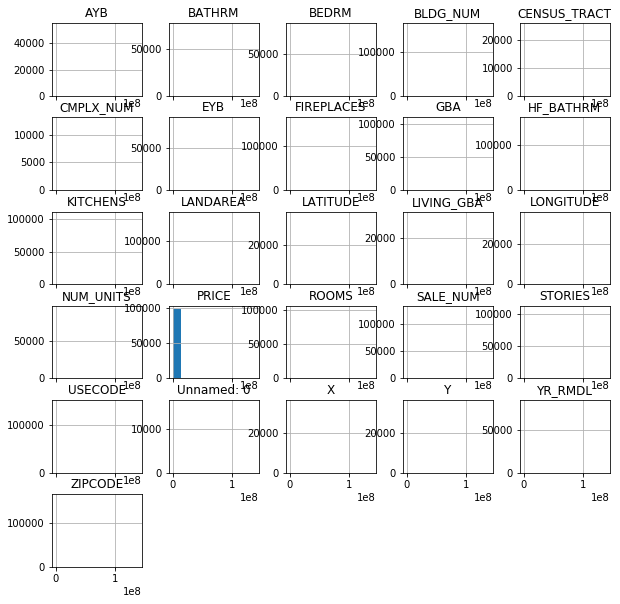

In [6]:
pima_df.hist(figsize=(10,10), sharex=True)

In [7]:
pima_df['AYB'].head()

0    1910.0
1    1898.0
2    1910.0
3    1900.0
4    1913.0
Name: AYB, dtype: float64

In [8]:
pima_df['BATHRM'].head()

0    4
1    3
2    3
3    3
4    2
Name: BATHRM, dtype: int64

In [9]:
pima_df['BEDRM'].head()

0    4
1    5
2    5
3    5
4    3
Name: BEDRM, dtype: int64

In [10]:
pima_df['BLDG_NUM'].head()

0    1
1    1
2    1
3    1
4    1
Name: BLDG_NUM, dtype: int64

In [11]:
pima_df['CENSUS_TRACT'].head()

0    4201.0
1    4201.0
2    4201.0
3    4201.0
4    4201.0
Name: CENSUS_TRACT, dtype: float64

In [12]:
pima_df['LATITUDE'].head()

0    38.914680
1    38.914683
2    38.914684
3    38.914683
4    38.914383
Name: LATITUDE, dtype: float64

In [13]:
pima_df['LONGITUDE'].head()

0   -77.040832
1   -77.040764
2   -77.040678
3   -77.040629
4   -77.039361
Name: LONGITUDE, dtype: float64

In [14]:
pima_df['NUM_UNITS'].head()

0    2.0
1    2.0
2    2.0
3    2.0
4    1.0
Name: NUM_UNITS, dtype: float64

In [15]:
pima_df['PRICE'].head()

0    1095000.0
1          NaN
2    2100000.0
3    1602000.0
4          NaN
Name: PRICE, dtype: float64

In [16]:
pima_df['ROOMS'].head()

0     8
1    11
2     9
3     8
4    11
Name: ROOMS, dtype: int64

In [17]:
pima_df['ZIPCODE'].head()

0    20009.0
1    20009.0
2    20009.0
3    20009.0
4    20009.0
Name: ZIPCODE, dtype: float64

In [18]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = pima_df['AYB'].mean()

#standard deviation of the column
std = pima_df['AYB'].std()

#each value in column minus the mean and then divide by the standard deviation
glucose_z_manual = (pima_df['AYB'] - mean)/std
mean, std


(1941.987579244546, 33.64023357603095)

In [19]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = pima_df['BATHRM'].mean()

#standard deviation of the column
std = pima_df['BATHRM'].std()

#each value in column minus the mean and then divide by the standard deviation
glucose_z_manual = (pima_df['BATHRM'] - mean)/std
mean, std
glucose_z_manual.head()

0    2.242248
1    1.218073
2    1.218073
3    1.218073
4    0.193898
Name: BATHRM, dtype: float64

In [20]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = pima_df['BEDRM'].mean()

#standard deviation of the column
std = pima_df['BEDRM'].std()

#each value in column minus the mean and then divide by the standard deviation
glucose_z_manual = (pima_df['BEDRM'] - mean)/std
mean, std

(2.7325062752819944, 1.3588642440202134)

In [21]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = pima_df['BLDG_NUM'].mean()

#standard deviation of the column
std = pima_df['BLDG_NUM'].std()

#each value in column minus the mean and then divide by the standard deviation
glucose_z_manual = (pima_df['BLDG_NUM'] - mean)/std
mean, std

(1.0005976459042383, 0.03162150570868554)

In [22]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = pima_df['CENSUS_TRACT'].mean()

#standard deviation of the column
std = pima_df['CENSUS_TRACT'].std()

#each value in column minus the mean and then divide by the standard deviation
glucose_z_manual = (pima_df['CENSUS_TRACT'] - mean)/std
mean, std

(5348.216324014193, 3369.645953218643)

In [23]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = pima_df['LATITUDE'].mean()

#standard deviation of the column
std = pima_df['LATITUDE'].std()

#each value in column minus the mean and then divide by the standard deviation
glucose_z_manual = (pima_df['LATITUDE'] - mean)/std

In [24]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = pima_df['LONGITUDE'].mean()

#standard deviation of the column
std = pima_df['LONGITUDE'].std()

#each value in column minus the mean and then divide by the standard deviation
glucose_z_manual = (pima_df['LONGITUDE'] - mean)/std
mean, std

(-77.01667631763974, 0.04093841015569089)

In [25]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = pima_df['NUM_UNITS'].mean()

#standard deviation of the column
std = pima_df['NUM_UNITS'].std()

#each value in column minus the mean and then divide by the standard deviation
glucose_z_manual = (pima_df['NUM_UNITS'] - mean)/std

In [26]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = pima_df['PRICE'].mean()

#standard deviation of the column
std = pima_df['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
glucose_z_manual = (pima_df['PRICE'] - mean)/std
mean, std

(931351.5949336156, 7061324.955612032)

In [27]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = pima_df['ROOMS'].mean()

#standard deviation of the column
std = pima_df['ROOMS'].std()

#each value in column minus the mean and then divide by the standard deviation
glucose_z_manual = (pima_df['ROOMS'] - mean)/std
mean, std

(6.187736306045031, 2.618164876300674)

In [28]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = pima_df['ZIPCODE'].mean()

#standard deviation of the column
std = pima_df['ZIPCODE'].std()

#each value in column minus the mean and then divide by the standard deviation
glucose_z_manual = (pima_df['ZIPCODE'] - mean)/std
mean, std

(20012.69456327537, 15.627084414654448)

In [29]:
minmax_sc = MinMaxScaler()

In [30]:
glucose_minmax = minmax_sc.fit_transform(pima_df[['BATHRM']])

C:\Users\kenbe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [31]:
glucose_minmax.mean(), glucose_minmax.std()

(0.12933416853973986, 0.06974234911947641)

In [32]:
glu_mm_col = pd.Series(glucose_minmax.reshape(-1))
glu_mm_col.head()

0    0.285714
1    0.214286
2    0.214286
3    0.214286
4    0.142857
dtype: float64

In [33]:
glu_mm_col.min(), glu_mm_col.max()

(0.0, 1.0)

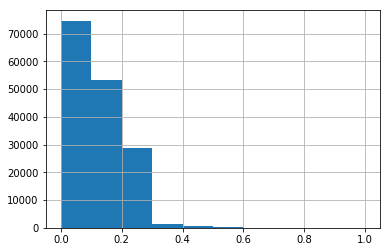

In [34]:
glu_mm_col.hist()

In [ ]:
# I couldn't figure out how to change the scale of the graph above